In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import os 

# Load the data
df_train = pd.read_csv('../Data/Constraint_Train.csv')
df_val = pd.read_csv('../Data/Constraint_Val.csv')
df_test = pd.read_csv('../Data/Constraint_Test.csv')

# Work with dataset copy then apply function to both train and val
df = df_train.copy()

In [29]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


Id -> useless; label -> encode.

In [30]:
# Drop ID column and convert label to [0;1]
def id_label(data):
    data = data.drop(['id'], axis=1)
    data.label = data.label.replace('fake','0')
    data.label = data.label.replace('real','1')
    data.label = data.label.astype(int)
    return data

df = id_label(df)

In [37]:
from nltk.corpus import stopwords
import nltk


# Download stopwards
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')


# remove stopwords from text and lemmatize text
def stopwords_lemmatization(text):
    final_text = []
    # lowercase text
    text = text.lower()
    # tokenize 
    text = nltk.word_tokenize(text)
    for word in text:
        # Keep only words not stopwords
        if word not in set(stopwords.words('english')):
            if
            # lemmatize
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zanet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zanet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zanet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocess text to be suitable for tokenization

In [38]:
def prepare_text(text):
    # Remove brackets
    text = re.sub('\[[^]]*\]', '', text)
    # Remove urls
    text = re.sub(r'http\S+', '', text)
    # remove stopwords and lemmatize
    text = stopwords_lemmatization(text)
    return text
    
df['tweet'] = df['tweet'].apply(prepare_text)

In [39]:
df.head()

,tweet,label
0,cdc currently report 99031 death . general dis...,1
1,state reported 1121 death small rise last tues...,1
2,politically correct woman ( almost ) us pandem...,0
3,# indiafightscorona : 1524 # covid testing lab...,1
4,populous state generate large case count look ...,1


<Figure size 720x720 with 0 Axes>

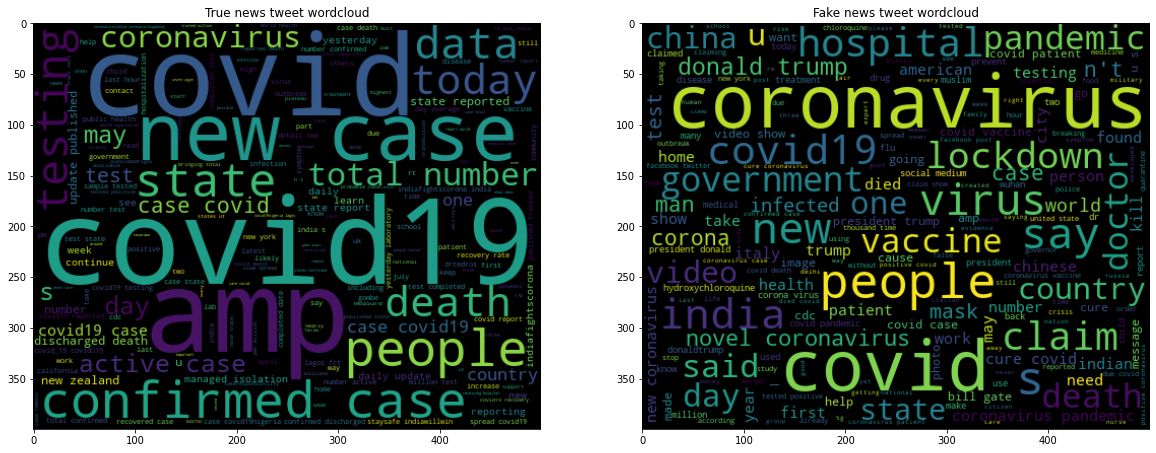

In [53]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (10,10))
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
wc_1 = WordCloud(max_words = 200 , width = 500 , height = 400 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].tweet))
wc_2 = WordCloud(max_words = 200 , width = 500 , height = 400 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].tweet))
ax1.imshow(wc_1 , interpolation = 'bilinear')
ax1.set_title('True news tweet wordcloud')
ax2.imshow(wc_2 , interpolation = 'bilinear')
ax2.set_title('Fake news tweet wordcloud')
plt.show()